I should probably also have a node color legend

In [22]:
from Connectome import *

In [23]:
connectome = Connectome('/Users/shamanthk/Documents/Research/IS-modeling-connectomes/Averaged_1015.graphml', label='')

In [24]:
connectome.read_net(use_3d=False)

In [25]:
graph = connectome.graph

graph.nodes

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157',

In [26]:
from scipy.sparse.csgraph import laplacian

# Adjacency matrix of the graph
A = nx.adjacency_matrix(graph)
L = laplacian(A, normed=True)

In [27]:
print(L)

<COOrdinate sparse array of dtype 'float64'
	with 199357 stored elements and shape (1015, 1015)>
  Coords	Values
  (0, 1)	-0.030949223029508643
  (0, 2)	-0.015342910298305389
  (0, 3)	-0.010895340841010223
  (0, 5)	-0.034752402342845795
  (0, 6)	-0.017972128867239735
  (0, 7)	-0.021516574145596757
  (0, 8)	-0.026688025634181187
  (0, 9)	-0.019374606457303212
  (0, 10)	-0.01911797782254681
  (0, 11)	-0.014967108502231243
  (0, 13)	-0.015819299929208316
  (0, 14)	-0.021166687833365082
  (0, 15)	-0.015214515486254613
  (0, 28)	-0.019920476822239894
  (0, 30)	-0.021884405476620423
  (0, 33)	-0.022893427324781505
  (0, 34)	-0.009638582199437336
  (0, 35)	-0.0167506302543202
  (0, 36)	-0.010336227882434039
  (0, 39)	-0.017376201171422898
  (0, 40)	-0.012634967392981722
  (0, 60)	-0.011697706772393273
  (0, 181)	-0.01152857439776791
  (0, 194)	-0.009092412093166349
  (0, 196)	-0.010180787029692101
  :	:
  (990, 990)	1.0
  (991, 991)	1.0
  (992, 992)	1.0
  (993, 993)	1.0
  (994, 994)	1.0
  (99

In [28]:
print(L.shape)

(1015, 1015)


In [29]:
import numpy as np
from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(L, k=10, which='SM')
eigenvalues

array([-2.99726844e-17,  7.66794108e-02,  2.79321880e-01,  3.19494815e-01,
        5.13371216e-01,  5.25405760e-01,  5.43529879e-01,  5.57769527e-01,
        7.13308424e-01,  7.22138051e-01])

In [30]:
def get_idx(eigenvalues):
    diff = 1e-4

    for i in range(len(eigenvalues) - 1):
        curr = eigenvalues[i]
        ne = eigenvalues[i+1]

        if np.abs(curr - ne) > diff and ne > 1e-6:
            return i+1, i+2

    return None

In [31]:
yi, yj = get_idx(eigenvalues)

In [32]:
yi, yj

(1, 2)

In [33]:
eigenvectors

array([[-1.34723670e-02, -1.27577974e-02,  1.12636408e-02, ...,
        -3.81478760e-02, -7.48114860e-02,  7.92555124e-02],
       [-1.20918195e-02, -1.20296240e-02,  9.75589203e-03, ...,
        -2.59045094e-02, -5.93747809e-02,  6.37796466e-02],
       [-2.43912276e-02, -2.30557863e-02,  1.81541514e-02, ...,
        -3.17119765e-02, -3.06031350e-02,  3.08893698e-02],
       ...,
       [-4.82106646e-02,  3.79502038e-02, -3.49874536e-02, ...,
        -9.33608368e-03, -7.06466407e-03, -6.64555126e-05],
       [-3.07872984e-02,  3.28999368e-02, -2.30909197e-02, ...,
        -1.68587987e-02, -1.41395254e-02,  7.44332044e-03],
       [-3.85659171e-02,  5.32129200e-03, -3.44459429e-02, ...,
         6.22005067e-03, -2.43196133e-02,  1.18502782e-02]])

In [34]:
eigenvalues.shape

(10,)

In [35]:
eigenvectors.shape

(1015, 10)

/var/folders/vb/0k5r3_317791vc8ty3xcxyq00000gn/T/ipykernel_89036/1780975271.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(eigenvectors[:, yi], eigenvectors[:, yj], cmap='viridis')


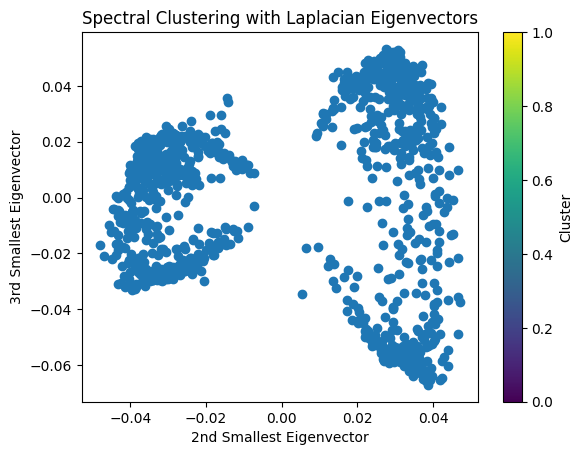

In [36]:
plt.scatter(eigenvectors[:, yi], eigenvectors[:, yj], cmap='viridis')
plt.xlabel("2nd Smallest Eigenvector")
plt.ylabel("3rd Smallest Eigenvector")
plt.title("Spectral Clustering with Laplacian Eigenvectors")
plt.colorbar(label="Cluster")
plt.show()

/var/folders/vb/0k5r3_317791vc8ty3xcxyq00000gn/T/ipykernel_89036/189119778.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(eigenvectors[:, yj], eigenvectors[:, yj+1], cmap='viridis')


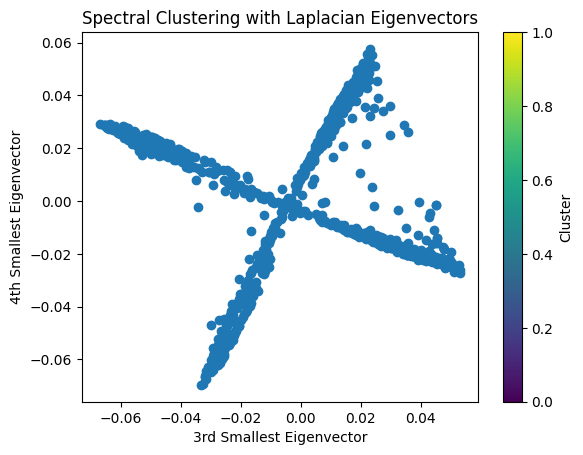

In [37]:
plt.scatter(eigenvectors[:, yj], eigenvectors[:, yj+1], cmap='viridis')
plt.xlabel("3rd Smallest Eigenvector")
plt.ylabel("4th Smallest Eigenvector")
plt.title("Spectral Clustering with Laplacian Eigenvectors")
plt.colorbar(label="Cluster")
plt.show()

In [38]:
fiedler_vector = eigenvectors[:, np.argsort(eigenvalues)[yi]]  # Second smallest eigenvector
node_importance = {node: fiedler_vector[i] for i, node in enumerate(graph.nodes)}

node_importance

{'1': np.float64(-0.012757797366566093),
 '2': np.float64(-0.012029623977179469),
 '3': np.float64(-0.023055786265112024),
 '4': np.float64(-0.03185849849870492),
 '5': np.float64(-0.008265430403033134),
 '6': np.float64(-0.010556529216942084),
 '7': np.float64(-0.018535990805095815),
 '8': np.float64(-0.015422737455148463),
 '9': np.float64(-0.013030220607319159),
 '10': np.float64(-0.017564397413108866),
 '11': np.float64(-0.018460475533886547),
 '12': np.float64(-0.023973834561157165),
 '13': np.float64(-0.02285102657935766),
 '14': np.float64(-0.023198607075483033),
 '15': np.float64(-0.017177800423882006),
 '16': np.float64(-0.024191536772546818),
 '17': np.float64(-0.016620876960983095),
 '18': np.float64(-0.011592010180182724),
 '19': np.float64(-0.019578645463004838),
 '20': np.float64(-0.013501016410626206),
 '21': np.float64(-0.016674626379826297),
 '22': np.float64(-0.007202750010513015),
 '23': np.float64(-0.009521516145491125),
 '24': np.float64(-0.016726829182277685),
 '2

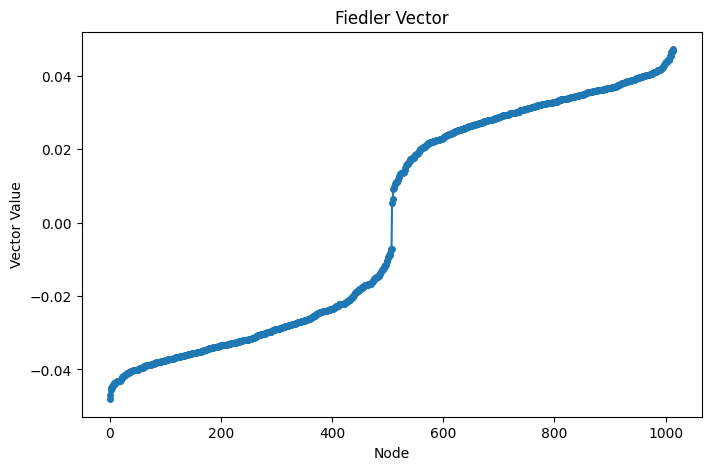

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(sorted(fiedler_vector), marker='o', linestyle='-', markersize=4)
plt.title("Fiedler Vector")
plt.xlabel("Node")
plt.ylabel("Vector Value")
plt.show()

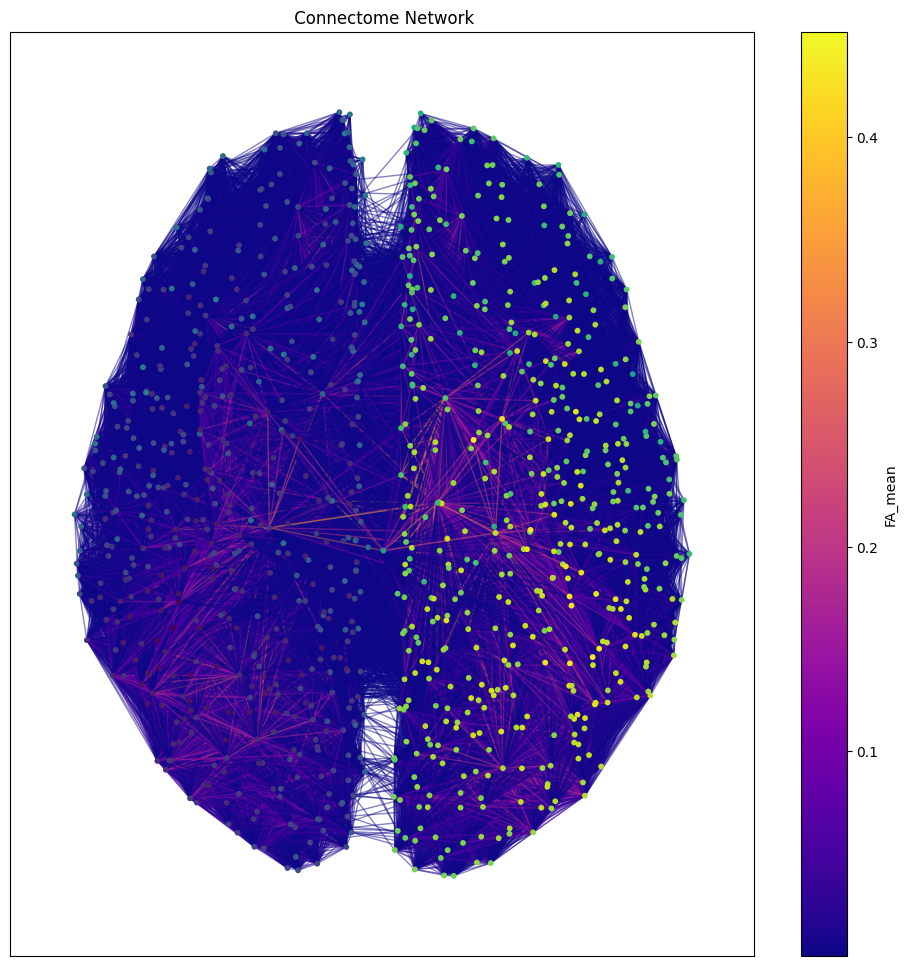

In [40]:
connectome.plot_net(use_3d=False, color_eig=[node_importance[node] for node in graph.nodes])